In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
kartai  =  np.random.randint(1, 10, 100) # amzius
sumokama_suma = np.random.randint(120, 789, 100) # pajamos

data = {'kartai':kartai, 'sumokama_suma':sumokama_suma}

df = pd.DataFrame(data)

df.to_csv('santykis.csv', index=False)

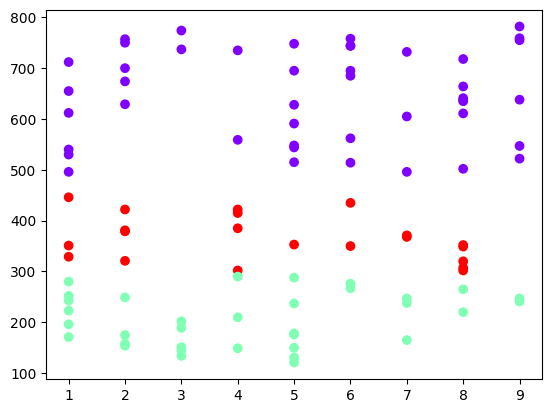

In [13]:
# 1) uzd
customer_data = pd.read_csv('santykis.csv')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit_predict(customer_data)
labels = model.labels_

plt.scatter(customer_data['kartai'], customer_data['sumokama_suma'], c=labels, cmap='rainbow') 
plt.show()


In [4]:
amzius  =  np.random.randint(18, 55, 100) # amzius
pajamos = np.random.randint(20000, 75000, 100) # pajamos

data = {'amzius':amzius, 'pajamos':pajamos}

df = pd.DataFrame(data)

df.to_csv('pajamos.csv', index=False)

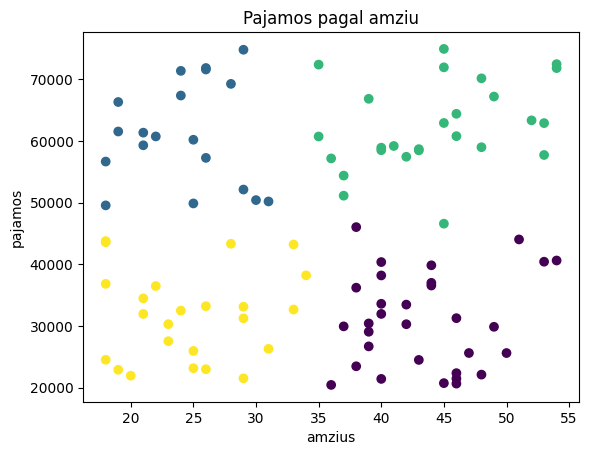

In [5]:
# 2)Naudojant K-vidurkių klasterizavimą, gyventojai gali būti suskirstyti į klasterius pagal jų amžių ir pajamas.
# Po klasterizavimo galima vizualizuoti klasterius ir jų centroidus, kad būtų lengviau interpretuoti gautus rezultatus.

data = pd.read_csv('pajamos.csv')

scaled_data = scaler.fit_transform(data) # iloc - index location

kmeans = KMeans(n_clusters=4, random_state= 30) #random state 

clusters = kmeans.fit_predict(scaled_data)
plt.scatter(data['amzius'], data['pajamos'], c=clusters, cmap='viridis')
plt.xlabel('amzius')
plt.ylabel('pajamos')
plt.title('Pajamos pagal amziu')
plt.show()


In [6]:
# 3) Naudodami DBSCAN klasterizavimą, galima identifikuoti pagrindinius automobilių maršrutus miesto centre pagal taškų tankumą.

latitude  =  np.random.uniform(53, 55, 100)
longitude = np.random.uniform(23, 25, 100)

data = {'latitude':latitude, 'longitude':longitude}

df = pd.DataFrame(data)

df.to_csv('kordinates.csv', index=False)

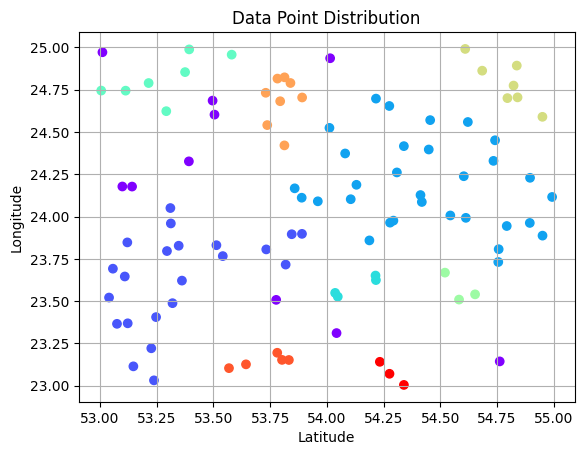

In [7]:
data = pd.read_csv('kordinates.csv')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

dbscan = DBSCAN(eps=0.2, min_samples=3)
clusters = dbscan.fit_predict(data)

plt.scatter(data['latitude'], data['longitude'], c = clusters, cmap='rainbow')
plt.title('Data Point Distribution')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid()

plt.show()

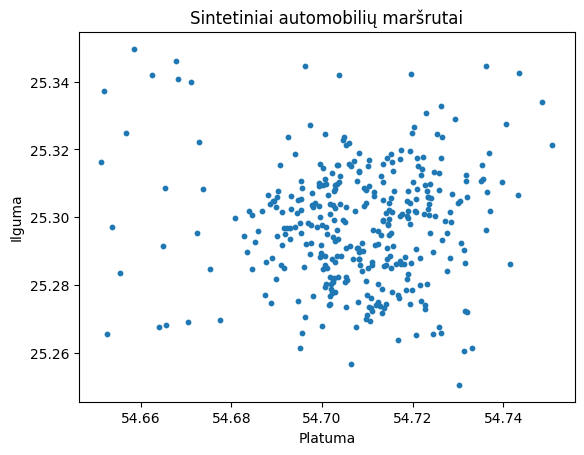

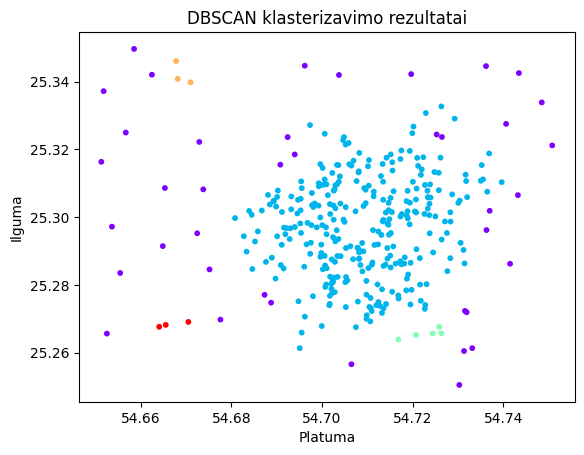

In [8]:

# Nustatykime atsitiktinių skaičių generatorių atkuriamam rezultatui
np.random.seed(42)

# Sukurkime pagrindinius kelius
road1 = np.random.normal(loc=[54.7, 25.3], scale=0.01, size=(100, 2))
road2 = np.random.normal(loc=[54.71, 25.28], scale=0.01, size=(100, 2))
road3 = np.random.normal(loc=[54.72, 25.31], scale=0.01, size=(100, 2))

# Sujunkime visus kelius į vieną masyvą
data = np.vstack((road1, road2, road3))

# Papildomai pridėkime kelis atsitiktinius taškus, kad modeliavimas būtų realistiškesnis
random_points = np.random.uniform(low=[54.65, 25.25], high=[54.75, 25.35], size=(50, 2))

# Sujunkime visus taškus
data = np.vstack((data, random_points))

# Sukurkime DataFrame, kad būtų lengviau dirbti
df = pd.DataFrame(data, columns=['latitude', 'longitude'])

# Vizualizuokime duomenis
plt.scatter(df['latitude'], df['longitude'], s=10)
plt.xlabel('Platuma')
plt.ylabel('Ilguma')
plt.title('Sintetiniai automobilių maršrutai')
plt.show()

# Skalizuokime duomenis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Taikykime DBSCAN algoritmą
dbscan = DBSCAN(eps=0.3, min_samples=3)
clusters = dbscan.fit_predict(scaled_data)

# Pridėkime klasterių informaciją į DataFrame
df['cluster'] = clusters

# Vizualizuokime klasterizacijos rezultatus
plt.scatter(df['latitude'], df['longitude'], c=df['cluster'], cmap='rainbow', s=10)
plt.xlabel('Platuma')
plt.ylabel('Ilguma')
plt.title('DBSCAN klasterizavimo rezultatai')
plt.show()

In [9]:
data = pd.read_csv('Gyvensena2016.csv')

def converter(new_data):
    for x in new_data:
        new_data = float(x)
    return new_data



scaler = StandardScaler()
scaled_data = scaler.fit_transform(data['gyvenimas_elektronines_cigaretes'], data['gyvenimas_tabakas'])

# el_cig = converter(data['gyvenimas_elektronines_cigaretes'])
# tabakas = converter(data['gyvenimas_tabakas'])

dbscan = DBSCAN(eps=0.2, min_samples=3)
clusters = dbscan.fit_predict(data)

plt.scatter(data['gyvenimas_tabakas'], data['gyvenimas_elektronines_cigaretes'], c = clusters, cmap='rainbow')
plt.title('Data Point Distribution')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid()

plt.show()

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.